<a href="https://colab.research.google.com/github/shin0105/4YP/blob/master/SVMregression_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GPyOpt
!pip install GPy

In [2]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import GPy
import GPyOpt

In [3]:
#reading csv file for Boston Housing Dataset
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['hou_all.csv']),\
                 names = ['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df.head()

Saving hou_all.csv to hou_all.csv


,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#parameters = CRIM , ZN, INDUS
X = df.iloc[:,0:3].to_numpy()

#target = MEDV
Y = df.iloc[:,-1].to_numpy()

#train test split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 10)

SVM = SVR()
SVM.fit(xTrain,yTrain)
yPred = SVM.predict(xTest)
print(SVM.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [20]:
#search domain
bounds = [ {'name': 'C', 'type': 'continuous', 'domain': (0.1, 1)},
        {'name': 'gamma', 'type': 'continuous', 'domain': (0.01, 0.1)}
      ]

#black-box function
def SVM_score(parameters):
  params = {
        'C': parameters[0][0],
        'gamma':parameters[0][1]
    }
  
  reg = SVR(C=params['C'],gamma=params['gamma'])
  reg.fit(xTrain,yTrain)
  yPred = reg.predict(xTest)
    
  #using negative MSE as score (loss function)
  score = -mean_squared_error(yPred,yTest)

  print(params)
  print(score)

  return score

In [21]:
kernel = GPy.kern.Matern32(input_dim=1, variance=1.0, lengthscale=1.0)

optimizer = GPyOpt.methods.BayesianOptimization(f=SVM_score, 
                                                domain=bounds,
                                                acquisition_type ='EI',
                                                initial_design_numdata = 5,
                                                model_type='GP',
                                                maximize=True,
                                                kernel=kernel
                                                )

optimizer.run_optimization(max_iter=20)

#minimum MSE
MSE_min=optimizer.fx_opt
#best parameters
params_min=optimizer.x_opt
print(MSE_min)
print(params_min)

{'C': 0.8730643089410797, 'gamma': 0.06732779159417636}
-84.96428362794528
{'C': 0.26743995865819764, 'gamma': 0.029659849767072942}
-93.46166868157042
{'C': 0.2570405496782957, 'gamma': 0.09901952243742015}
-96.30506330656438
{'C': 0.9104142627131867, 'gamma': 0.07607666881758393}
-84.478733860262
{'C': 0.2556554627276017, 'gamma': 0.08200430220176642}
-96.14883286802734
{'C': 0.8932712323751444, 'gamma': 0.01013334868560715}
-86.8148191097043
{'C': 0.9239485829490104, 'gamma': 0.04869995371472521}
-84.34834517464526
{'C': 0.8537920734946411, 'gamma': 0.028872403304034663}
-85.2491214482147
{'C': 1.0, 'gamma': 0.015685711678350006}
-84.88972128057112
{'C': 1.0, 'gamma': 0.03708606882969392}
-83.6405431440955
{'C': 1.0, 'gamma': 0.04603356190484066}
-83.5165465752495
{'C': 1.0, 'gamma': 0.0756715709851904}
-83.53151412953488
{'C': 1.0, 'gamma': 0.07184777435759752}
-83.61073235841104
{'C': 1.0, 'gamma': 0.0784314267376149}
-83.40234374109156
{'C': 1.0, 'gamma': 0.0426732052610507}
-83.

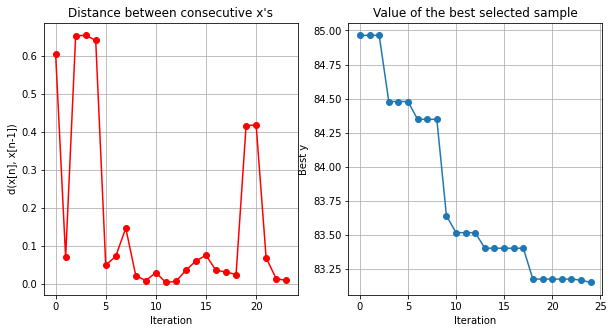

In [22]:
optimizer.plot_convergence()